In [107]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from main.utils import time_utils, data_manage_utils
from IPython.core.display import display

# Variables
ROOT_PATH = os.path.abspath("../../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/base/reg")
OUTPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/processed_files")



C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\2956954418.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


### Loading Data

In [108]:
data_set = data_manage_utils.load_processed_data_by_folder(INPUT_FOLDER)
print("Shapes of loaded data:")
data_manage_utils.print_shapes(*data_set)
X_train, y_train, X_test, y_test = data_set
print("\nX_train: ")
display(X_train)
print("\n y_train: ")
display(y_train)

Shapes of loaded data:
Shape of X_train: (263204, 45)
Shape of y_train: (263204,)
Shape of X_test: (65801, 45)
Shape of y_test: (65801,)

X_train: 


,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5998106,-11.0,-11.0,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,...,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0
9744846,-11.0,-11.0,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,...,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0
8656393,-11.0,-9.0,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,...,0,0,3,0,2,0.0,3.0,0.0,0.0,3.0
7404998,-11.0,-8.0,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,...,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0
8855927,-11.0,-5.0,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,...,0,0,0,2,0,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6.0,-9.0,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,...,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0
7551519,-11.0,-15.0,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7375452,-11.0,-8.0,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,...,0,2,2,2,2,0.0,0.0,3.0,0.0,0.0
7757994,-6.0,-8.0,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0



 y_train: 


5998106    109
9744846     -5
8656393     46
7404998    -19
8855927     59
          ... 
6033952    -15
7551519    -33
7375452     -1
7757994    158
7249134      5
Name: ARR_DELAY_MINS, Length: 263204, dtype: int32

We see that this is most definitely the loaded regression set and also that the shapes fit. Ideal for the next steps.

### Feature Reduction

Due to the analysis within the "variance_correlation" and "experimental_data_analysis" files, I reduce features that fulfills one of the following criteria: 
- Feature is not relevant to the use case
- Feature variance is low and better feature is available
- Feature correlates strongly with another feature that is being used and contains similar information.


#### Variance-Based Elimination

As seen in the analysis file especially 2 columns are not really interesting in our data set. These are JET(Y/N) and NR_ENGINES. 

In [109]:
X_train = X_train.drop(["NR_ENGINES", "JET(YN)"], axis="columns", errors = "ignore")
X_test = X_test.drop(["NR_ENGINES", "JET(YN)"], axis="columns", errors = "ignore")

#### Correlation-Based Elimination

Especially the temperatures and aircraft columns are highly correlating to each other. Based on EDA we eliminate some highly correlating features. 

##### Aircraft Specifications
In this data group, Wingspan and Length are dropped since we have the squared feature that contains this information already. MTOW is also highly correlating with the squared feature "PARKING_AREA(SQM)" and is in worse shape than the squared feature. That's why MTOW is also dropped. 

##### Temperature Data Drop
We have lots of different Versions of temperatures. Especially felt temp, is highly correlating with the measured temperature. The "FELT_TEMP" will therefore be discarded.

##### Sea Level Pressure vs. Altimeter
When it comes to these 2 features, Sea Level Pressure has a better scale and data distribution. At least to a very small degree. Thats why Altimeter will be dropped 

In [110]:
# Aircraft Specification Drop
X_train = X_train.drop(["WINGSPAN(M)", "LENGTH(M)", "MTOW(KG)"], axis="columns", errors="ignore")
X_test = X_test.drop(["WINGSPAN(M)", "LENGTH(M)", "MTOW(KG)"], axis="columns", errors="ignore")

# Temperatures Drop
X_train = X_train.drop(["FELT_TEMP(C)"], axis="columns", errors="ignore")
X_test = X_test.drop(["FELT_TEMP(C)"], axis="columns", errors="ignore")

# Pressure Data Drop
X_train = X_train.drop(["ALTIMETER(PA)"], axis="columns", errors="ignore")
X_test = X_test.drop(["ALTIMETER(PA)"], axis="columns", errors="ignore")

### Final Check

In [111]:
print("Check if shapes still in order")
data_manage_utils.print_shapes(X_train, y_train, X_test, y_test)

Check if shapes still in order
Shape of X_train: (263204, 38)
Shape of y_train: (263204,)
Shape of X_test: (65801, 38)
Shape of y_test: (65801,)


### Feature Importance Analysis

Here we try to establish a small random forest regressor with a depth of 4 to establish decent probable combinations of data. Most importantly, looking into combining some of the event features and then finding most important features based on importance in order to get rid of low performing features. 

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

def calc_importances(clf, X, y, verbose=0):
    clf.fit(X, y)
    perm_imp= permutation_importance(clf, X, y, n_repeats=10, n_jobs=2).get("importances_mean") 
    gini_imp = clf.feature_importances_
    if verbose > 0:
        print("Permutation Importances: ")
        print(perm_imp)
        print("Gini Importance: ")
        print(gini_imp)
    return gini_imp ,perm_imp

def plot_feature_importances(X, gini_importances, permutation_importances):
    features = list(X.columns)  # Example feature names
    
    # Sort feature importances and corresponding feature names
    sorted_gini_importance, gini_features = zip(*sorted(zip(gini_importances, features), reverse=True))
    sorted_permutation_importance, perm_features = zip(*sorted(zip(permutation_importances, features), reverse=True))
    
    # Create subplots
    fig, axs = plt.subplots(2)
    
    # Increase figure size
    fig.set_size_inches(12, 10)
    
    # Plot sorted gini impurity feature importance
    axs[0].bar(gini_features, sorted_gini_importance, color='blue', width=0.5)
    axs[0].set_ylabel('Gini Impurity Feature Importance')
    axs[0].set_yscale('log')  # Set y-scale to logarithmic
    axs[0].set_title('Gini Impurity Feature Importance')
    
    # Plot sorted permutation importance
    axs[1].bar(perm_features, sorted_permutation_importance, color='green', width=0.5)
    axs[1].set_ylabel('Permutation Importance')
    axs[1].set_yscale('log')  # Set y-scale to logarithmic
    axs[1].set_title('Permutation Importance')
    
    # Rotate x-axis labels for better readability
    axs[0].set_xticklabels(gini_features, rotation=45, ha='right')
    axs[1].set_xticklabels(perm_features, rotation=45, ha='right')
    
    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.show()

### Plotting Results for Importance Results

C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\4249855050.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(gini_features, rotation=45, ha='right')
C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\4249855050.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(perm_features, rotation=45, ha='right')


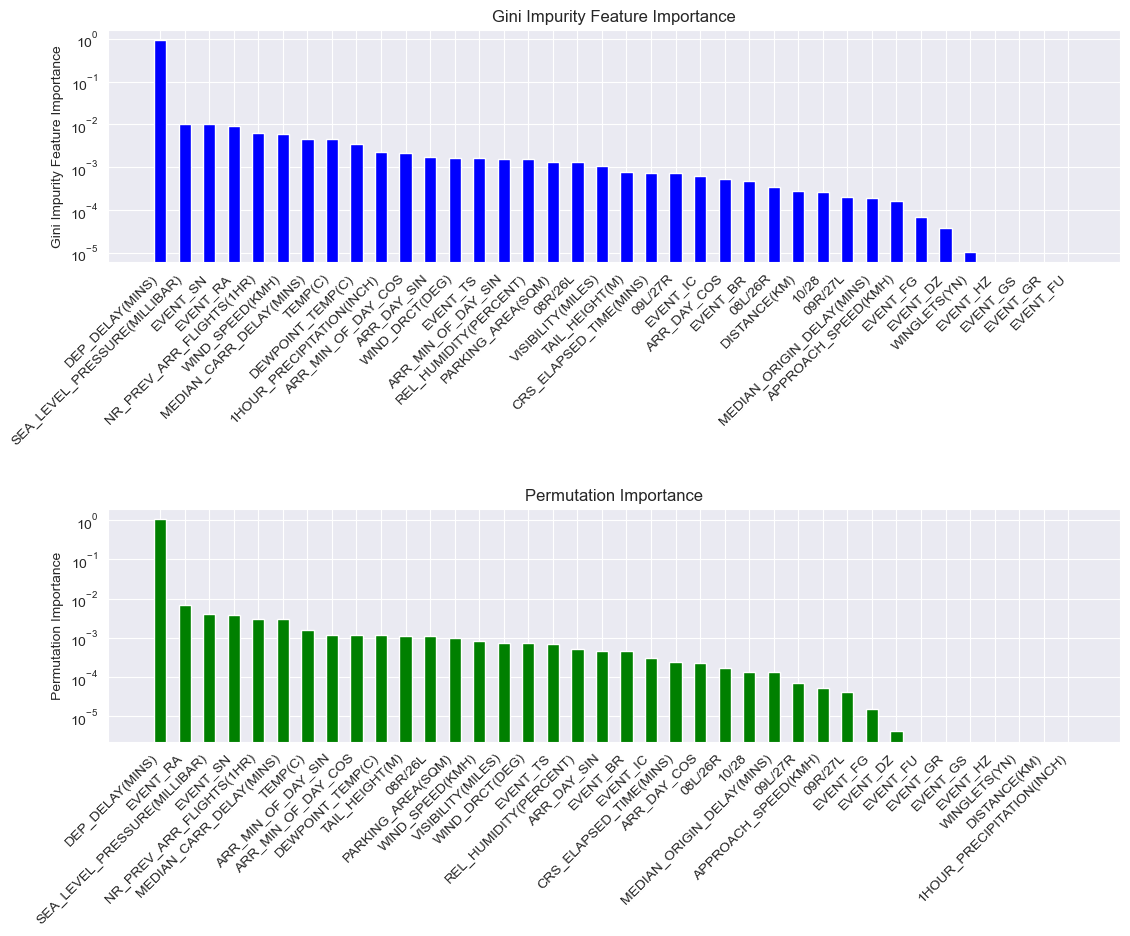

In [113]:
rfr = RandomForestRegressor(max_depth=4, random_state=42, n_jobs=2, max_features=0.33)
plot_feature_importances(X_train, *calc_importances(rfr, X_train, y_train))

C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\4249855050.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(gini_features, rotation=45, ha='right')
C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\4249855050.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(perm_features, rotation=45, ha='right')


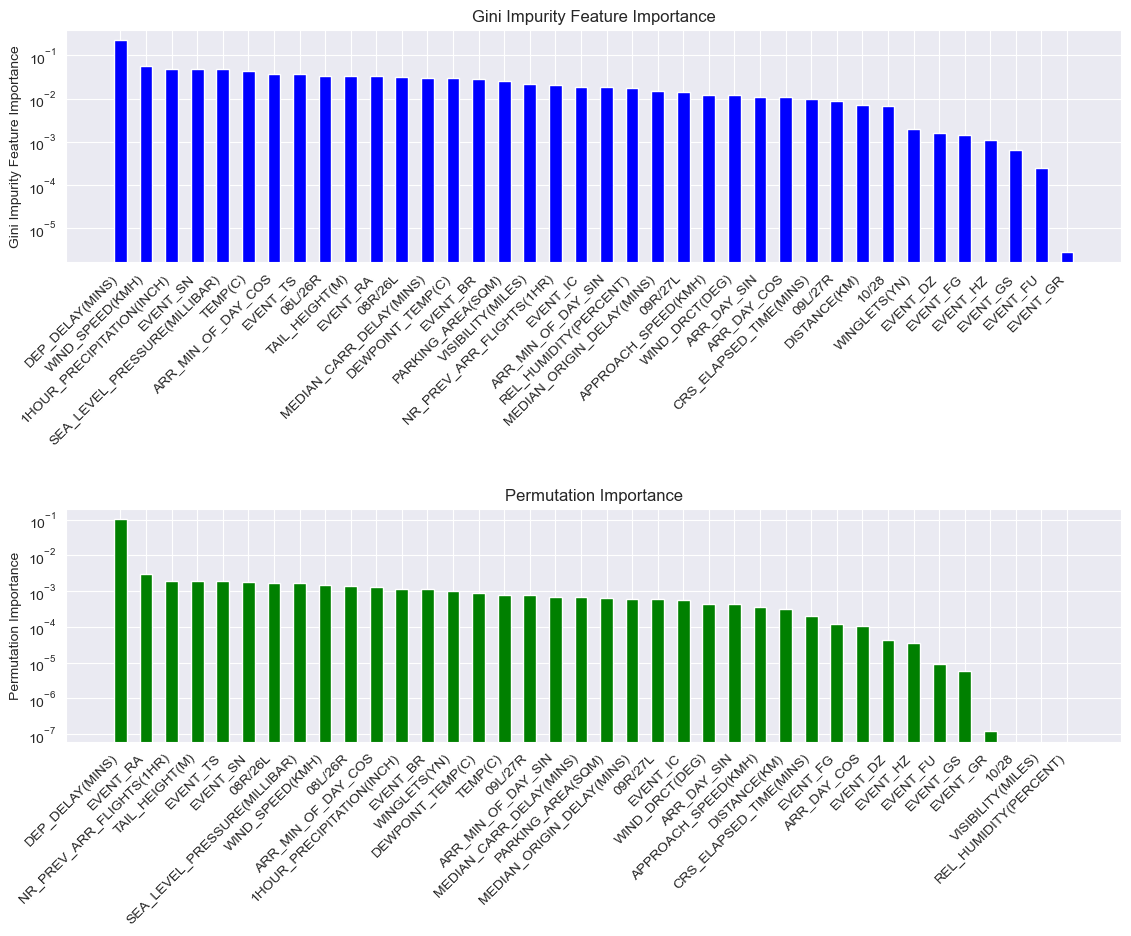

In [114]:
plot_feature_importances(X_train, *calc_importances(RandomForestRegressor(max_depth=4, random_state=42, n_jobs=2, max_features=1), X_train, y_train))

### Experimental Deletion for Arr Delay
Since previous experiments have shown that ARR_DELAY_MINS is the only important feature for the model, I try to get ri of it for this run. 

In [115]:
# Removing ARR_DELAY_MINS
X_train_red = X_train.drop(["DEP_DELAY(MINS)"], axis="columns", errors="ignore")
X_test_red = X_test.drop(["DEP_DELAY(MINS)"], axis="columns", errors="ignore")

C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\4249855050.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(gini_features, rotation=45, ha='right')
C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\4249855050.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(perm_features, rotation=45, ha='right')


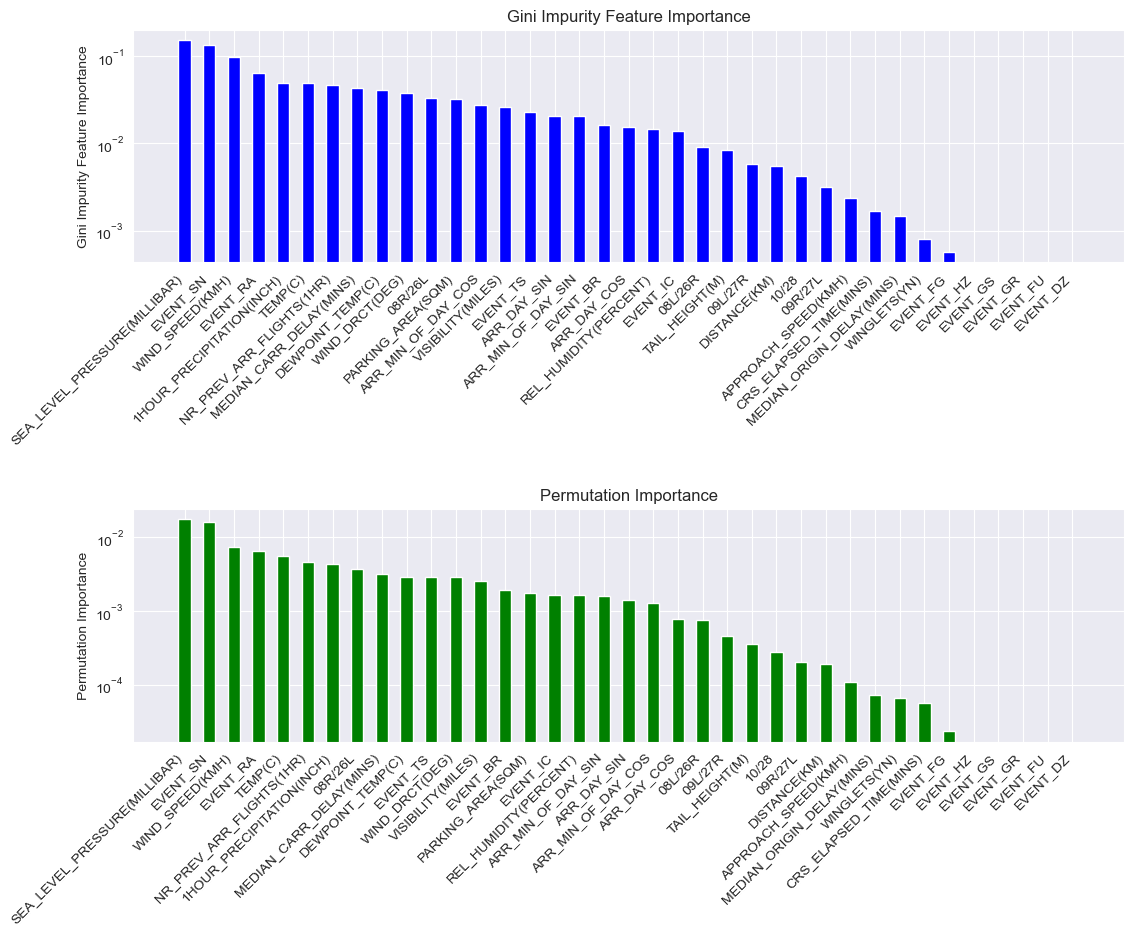

In [116]:
plot_feature_importances(X_train_red, *calc_importances(RandomForestRegressor(max_depth=4, random_state=42, n_jobs=2, max_features=0.33), X_train_red, y_train))

C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\4249855050.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(gini_features, rotation=45, ha='right')
C:\Users\chrig\AppData\Local\Temp\ipykernel_12512\4249855050.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(perm_features, rotation=45, ha='right')


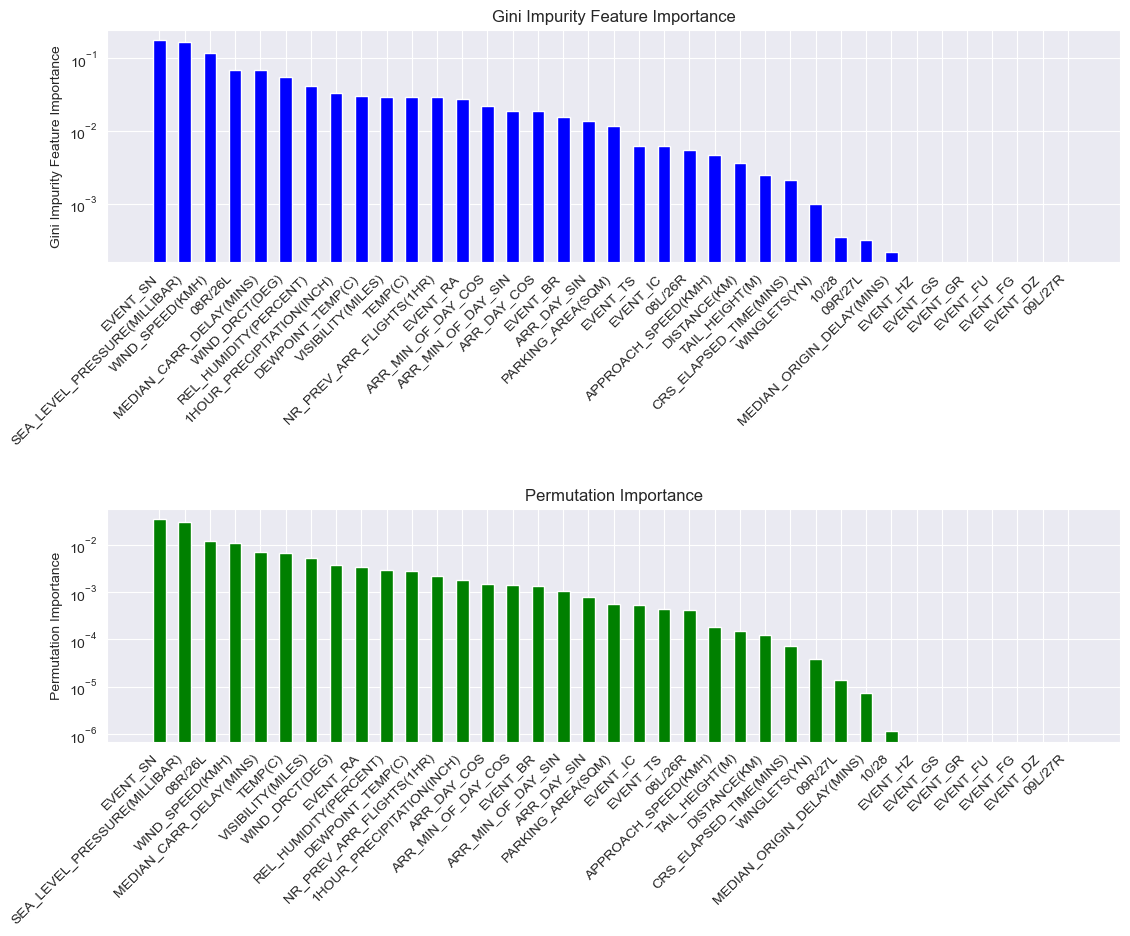

In [117]:
plot_feature_importances(X_train_red, *calc_importances(RandomForestRegressor(max_depth=4, random_state=42, n_jobs=2, max_features=1.0), X_train_red, y_train))

### Cross Validation Checks

Before we really delete the features based on feature importance, I want to check wether or not I would ruin my set with it. 

In [118]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

# Def fixed variables
results = []
max_depth = 4
random_state = 42
scoring = "neg_root_mean_squared_error"
cv = 5
n_jobs = 2
verbose = 1


In [119]:
# Iter 1
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=0.33)
results.append((1,cross_validate(estimator=rfr, X=X_train, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  1.7min finished


In [120]:
# Iter 2
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=1)
results.append((2,cross_validate(estimator=rfr, X=X_train, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   24.0s finished


In [121]:
# Iter 3
X_train_red = X_train.drop(["DEP_DELAY(MINS)"], axis="columns", errors="ignore")
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=0.33)
results.append((3,cross_validate(estimator=rfr, X=X_train_red, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  1.7min finished


In [122]:
# Iter 4
X_train_red = X_train.drop(["DEP_DELAY(MINS)"], axis="columns", errors="ignore")
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=1)
results.append((4,cross_validate(estimator=rfr, X=X_train_red, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   24.3s finished


In [123]:
# Iter 5
event_cols = [col for col in X_train.columns if col.startswith("EVENT")]
X_train_copy = X_train.copy()
for col in event_cols:
    _series = X_train_copy[col] > 0
    X_train_copy[col] = _series.astype(int)
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=1)
results.append((5,cross_validate(estimator=rfr, X=X_train_copy, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   24.5s finished


In [152]:
def transform_notam_cols(X: pd.DataFrame):
    notam_cols = ["08L/26R", "08R/26L", "09L/27R", "09R/27L", "10/28"]
    if not all([col in X.columns for col in notam_cols]):
        print("Notam calls not detected in DataFrame. Returning same DataFrame")
        return X
    X_train_copy = X.copy()
    for col in notam_cols:
        _series = X_train_copy[col] > 0
        X_train_copy[col] = _series.astype(int)
    X_train_copy["RUNWAY_ERROR(PERC)"] = X_train_copy[notam_cols].sum(axis=1) / 5
    X_train_copy = X_train_copy.drop(notam_cols, axis="columns", errors = "ignore")
    return X_train_copy

In [124]:
# Iter 6
X_train_copy = transform_notam_cols(X_train)
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=1)
results.append((6,cross_validate(estimator=rfr, X=X_train_copy, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

# Iter 7 
# Only changing the max_features. Keep in same cell
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=0.3)
results.append((7,cross_validate(estimator=rfr, X=X_train_copy, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   24.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  1.4min finished


In [125]:
# Iter 8
low_importance_cols = ["EVENT_DZ", "EVENT_FU", "EVENT_GR", "EVENT_GS", "EVENT_HZ", "EVENT_FG"]
X_train_red = X_train.copy()
X_train_red = X_train_red.drop(low_importance_cols, axis="columns", errors="ignore")
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=1)
results.append((8,cross_validate(estimator=rfr, X=X_train_red, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   18.9s finished


In [126]:
# Iter 9
low_importance_cols = ["EVENT_DZ", "EVENT_FU", "EVENT_GR", "EVENT_GS", "EVENT_HZ", "EVENT_FG"]
X_train_red = X_train.copy()
X_train_red = X_train_red.drop(low_importance_cols, axis="columns", errors="ignore")
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=0.33)
results.append((9,cross_validate(estimator=rfr, X=X_train_red, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:  1.6min finished


In [127]:
# Iter 10
X_train_copy = transform_notam_cols(X_train)
X_train_copy = X_train_copy.drop(["MEDIAN_ORIGIN_DELAY(MINS)", "MEDIAN_CARR_DELAY(MINS)"], axis="columns", errors="ignore")
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=1)
results.append((6,cross_validate(estimator=rfr, X=X_train_copy, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   23.6s finished


In [131]:
# Iter 11
X_train_copy = transform_notam_cols(X_train)
X_train_copy = X_train_copy.drop(["MEDIAN_ORIGIN_DELAY(MINS)", "MEDIAN_CARR_DELAY(MINS)"], axis="columns", errors="ignore")
X_train_copy = X_train_copy.drop(low_importance_cols, axis="columns", errors="ignore")
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=1)
results.append((11,cross_validate(estimator=rfr, X=X_train_copy, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   21.2s finished


In [129]:
def print_cv_results(results):
    # Metrics
    metrics = ['fit_time', 'test_score', 'train_score']
    metric_labels = ['fit time seconds', 'test rms error', 'train rms error']
    num_metrics = len(metrics)
    
    # Sorting based on iterations
    sorted_results = sorted(results, key=lambda x:x[0])
    sorted_results = [item[1] for item in sorted_results]
    
    # Calculating Means of Results
    for res in sorted_results:
        for key in res.keys():
            res.update({key: np.abs(np.mean(res.get(key)))})
            
    # Bar chart
    bar_width = 0.2
    indexes = range(len(sorted_results))
    
    for i, metric in enumerate(metrics):
         plt.bar([idx + i * bar_width for idx in indexes], [res.get(metric) for res in sorted_results], bar_width, label=metric_labels[i])
    
    # Adding labels and title
    plt.xlabel('Iteration')
    plt.ylabel('Scores')
    plt.title('CV RMS-Error and Fit Times per Iteration')
    plt.xticks([i + (num_metrics - 1) * bar_width / 2 for i in indexes], range(1, len(sorted_results)+1))
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

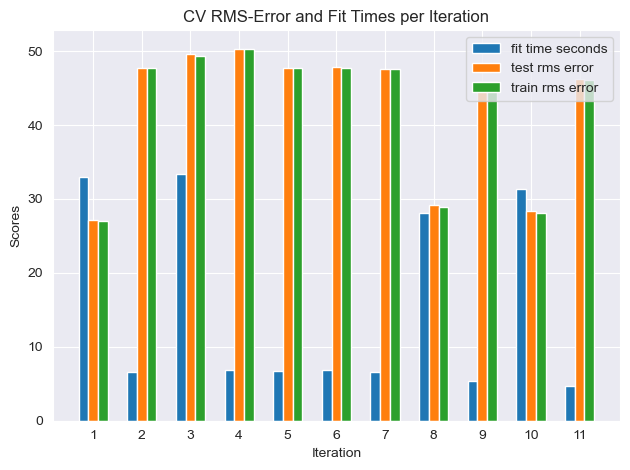

In [132]:
print_cv_results(results)

In [133]:
results

[(1,
  {'fit_time': 32.95388135910034,
   'score_time': 0.2621034622192383,
   'test_score': 27.19715061227845,
   'train_score': 26.98906991910265}),
 (2,
  {'fit_time': 6.642060470581055,
   'score_time': 0.2994724750518799,
   'test_score': 47.67982808882171,
   'train_score': 47.65254913123526}),
 (3,
  {'fit_time': 33.43493790626526,
   'score_time': 0.2741513729095459,
   'test_score': 49.55325041760352,
   'train_score': 49.379491669800444}),
 (4,
  {'fit_time': 6.82009916305542,
   'score_time': 0.29582834243774414,
   'test_score': 50.28792264952556,
   'train_score': 50.26658897967389}),
 (5,
  {'fit_time': 6.712379407882691,
   'score_time': 0.31837663650512693,
   'test_score': 47.67387016940126,
   'train_score': 47.64987927857825}),
 (6,
  {'fit_time': 6.821857213973999,
   'score_time': 0.2818392276763916,
   'test_score': 47.81115746757791,
   'train_score': 47.76903681720377}),
 (7,
  {'fit_time': 28.064186143875123,
   'score_time': 0.2640381336212158,
   'test_score'

In [134]:
def score_impact_per_column(clf, X: pd.DataFrame, y: pd.DataFrame, scoring: str, cv = 5, n_jobs = 2, verbose = 0):
    results = []
    
    
    base_score = cross_validate(estimator=clf, X=X, y=y, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)
    
    for n, col in enumerate(X.columns):
        print(f"Run {n+1}/{len(X.columns)}")
        X_copy = X.copy()
        X_copy = X_copy.drop(col, axis="columns", errors="ignore")
        score = cross_validate(estimator=clf, X=X_copy, y=y, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)
        results.append({
            "key": col,
            "fit_time": np.abs(np.mean(score.get("fit_time"))) - np.abs(np.mean(base_score.get("fit_time"))),
            "test_score": np.abs(np.mean(score.get("test_score"))) - np.abs(np.mean(base_score.get("test_score"))),
            "train_score": np.abs(np.mean(score.get("train_score"))) - np.abs(np.mean(base_score.get("train_score"))),
        })
    return results

In [135]:
# Def fixed variables
max_depth = 4
random_state = 42
scoring = "neg_root_mean_squared_error"
cv = 5
n_jobs = 2
verbose = 0
rfr = RandomForestRegressor(max_depth=max_depth, random_state=random_state, max_features=1)


results = score_impact_per_column(clf=rfr, X=X_train, y=y_train, scoring=scoring)
results

Run 1/38
Run 2/38
Run 3/38
Run 4/38
Run 5/38
Run 6/38
Run 7/38
Run 8/38
Run 9/38
Run 10/38
Run 11/38
Run 12/38
Run 13/38
Run 14/38
Run 15/38
Run 16/38
Run 17/38
Run 18/38
Run 19/38
Run 20/38
Run 21/38
Run 22/38
Run 23/38
Run 24/38
Run 25/38
Run 26/38
Run 27/38
Run 28/38
Run 29/38
Run 30/38
Run 31/38
Run 32/38
Run 33/38
Run 34/38
Run 35/38
Run 36/38
Run 37/38
Run 38/38


[{'key': 'MEDIAN_CARR_DELAY(MINS)',
  'fit_time': -0.6094605445861814,
  'test_score': -0.8916732697903171,
  'train_score': -0.8893713680735544},
 {'key': 'MEDIAN_ORIGIN_DELAY(MINS)',
  'fit_time': -0.6034658432006834,
  'test_score': -0.9424228476732353,
  'train_score': -0.9387848157351542},
 {'key': 'DEP_DELAY(MINS)',
  'fit_time': 0.303002500534058,
  'test_score': 2.6080945607038544,
  'train_score': 2.6140398484386296},
 {'key': 'CRS_ELAPSED_TIME(MINS)',
  'fit_time': 1.4135064601898195,
  'test_score': 0.05072989302482256,
  'train_score': 0.048446116187946586},
 {'key': 'DISTANCE(KM)',
  'fit_time': 2.272035455703736,
  'test_score': 0.04130638331344727,
  'train_score': 0.04062377545118068},
 {'key': 'NR_PREV_ARR_FLIGHTS(1HR)',
  'fit_time': 1.943421030044556,
  'test_score': 0.054386668541823724,
  'train_score': 0.057633616358650386},
 {'key': 'ARR_DAY_SIN',
  'fit_time': 2.877381753921509,
  'test_score': -0.10950072069281447,
  'train_score': -0.11171980832173745},
 {'key

In [136]:
def print_score_change(results):
    # sort results by test_score
    data = sorted(results, key= lambda res: res.get("test_score"))
    
    # Extracting keys (column names)
    keys = [entry["key"] for entry in data]
    
    # Extracting fit_time, test_score, and train_score for each key
    fit_times = [entry["fit_time"] for entry in data]
    test_scores = [entry["test_score"] for entry in data]
    train_scores = [entry["train_score"] for entry in data]
    
    # Setting up the positions for the bars
    x = np.arange(len(keys))
    
    # Width of each bar and plot
    width = 0.3  # Adjusted width for larger bars
    fig,ax = plt.subplots(figsize=(18,5))
    
    plt.bar(x - width, fit_times, width=width, label='Fit Time')
    plt.bar(x, test_scores, width=width, label='Test Score')
    plt.bar(x + width, train_scores, width=width, label='Train Score')
    
    # Adding labels and title
    plt.xlabel('Columns')
    plt.ylabel('RMS-Score Change')
    plt.title('Performance Metric Change by Deleted Column')
    plt.ylim([-1,1])
    plt.xticks(x, keys, rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
    plt.legend()
    
    # Showing the plot
    plt.tight_layout()
    plt.show()

Run 1/38
Run 2/38
Run 3/38
Run 4/38
Run 5/38
Run 6/38
Run 7/38
Run 8/38
Run 9/38
Run 10/38
Run 11/38
Run 12/38
Run 13/38
Run 14/38
Run 15/38
Run 16/38
Run 17/38
Run 18/38
Run 19/38
Run 20/38
Run 21/38
Run 22/38
Run 23/38
Run 24/38
Run 25/38
Run 26/38
Run 27/38
Run 28/38
Run 29/38
Run 30/38
Run 31/38
Run 32/38
Run 33/38
Run 34/38
Run 35/38
Run 36/38
Run 37/38
Run 38/38


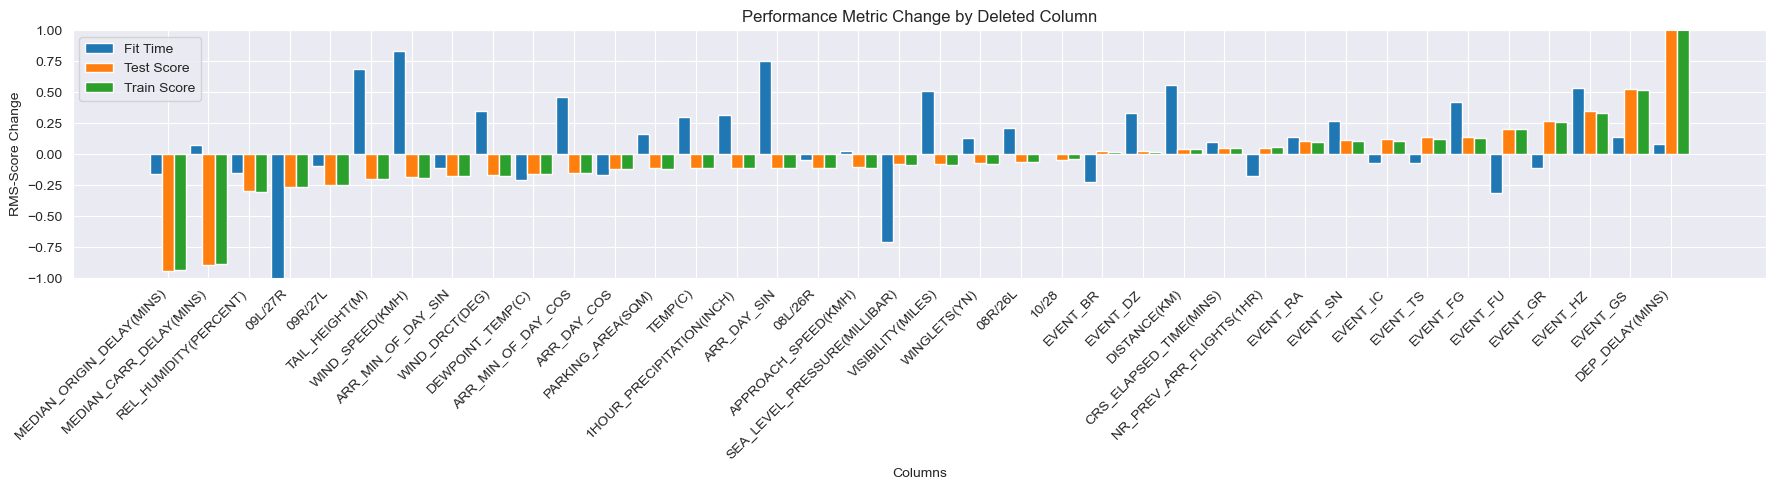

In [137]:
print_score_change(score_impact_per_column(clf=rfr, X=X_train, y=y_train, scoring=scoring))

Run 1/37
Run 2/37
Run 3/37
Run 4/37
Run 5/37
Run 6/37
Run 7/37
Run 8/37
Run 9/37
Run 10/37
Run 11/37
Run 12/37
Run 13/37
Run 14/37
Run 15/37
Run 16/37
Run 17/37
Run 18/37
Run 19/37
Run 20/37
Run 21/37
Run 22/37
Run 23/37
Run 24/37
Run 25/37
Run 26/37
Run 27/37
Run 28/37
Run 29/37
Run 30/37
Run 31/37
Run 32/37
Run 33/37
Run 34/37
Run 35/37
Run 36/37
Run 37/37


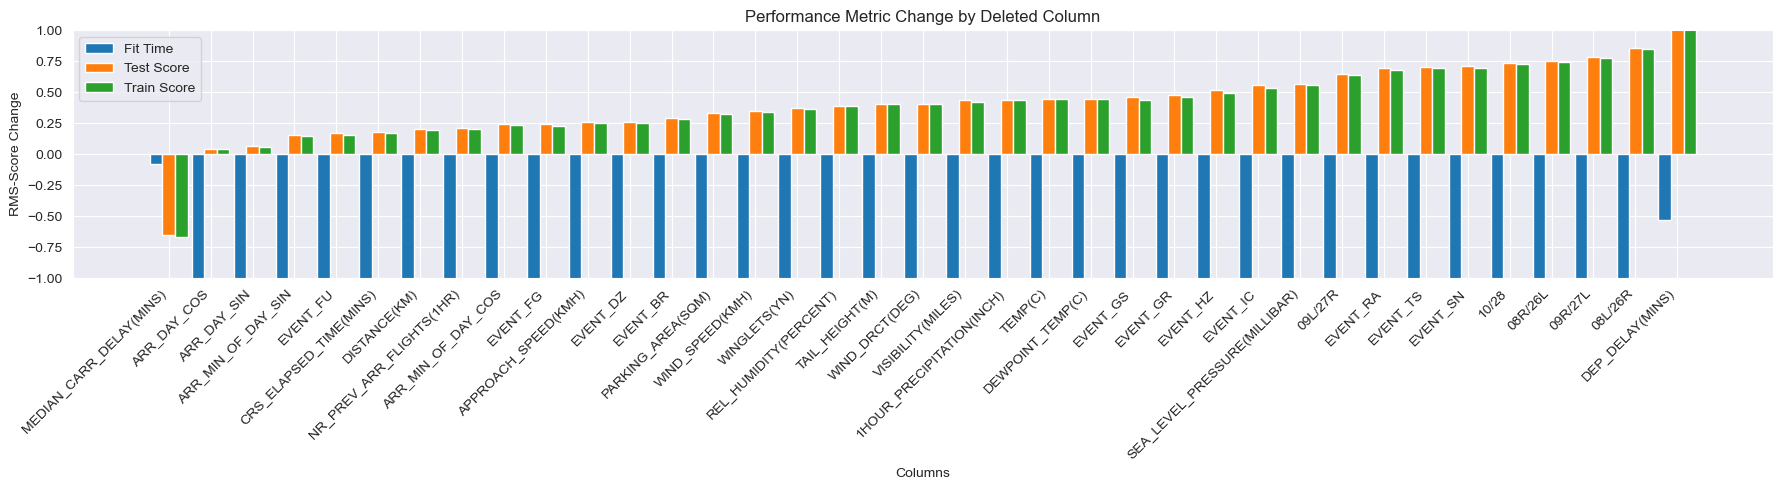

In [138]:
X_train_red = X_train.drop(["MEDIAN_ORIGIN_DELAY(MINS)"], axis="columns")
print_score_change(score_impact_per_column(clf=rfr, X=X_train_red, y=y_train, scoring=scoring))

Run 1/36
Run 2/36
Run 3/36
Run 4/36
Run 5/36
Run 6/36
Run 7/36
Run 8/36
Run 9/36
Run 10/36
Run 11/36
Run 12/36
Run 13/36
Run 14/36
Run 15/36
Run 16/36
Run 17/36
Run 18/36
Run 19/36
Run 20/36
Run 21/36
Run 22/36
Run 23/36
Run 24/36
Run 25/36
Run 26/36
Run 27/36
Run 28/36
Run 29/36
Run 30/36
Run 31/36
Run 32/36
Run 33/36
Run 34/36
Run 35/36
Run 36/36


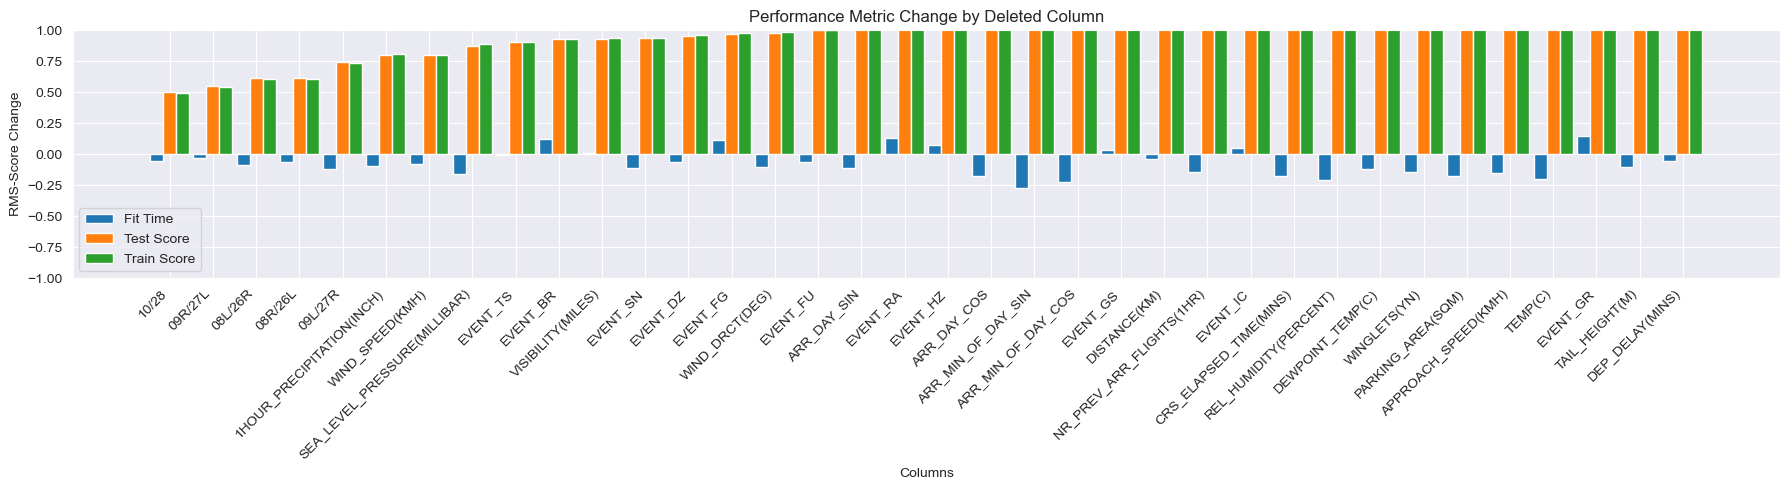

In [139]:
X_train_red = X_train_red.drop(["MEDIAN_CARR_DELAY(MINS)"], axis="columns")
print_score_change(score_impact_per_column(clf=rfr, X=X_train_red, y=y_train, scoring=scoring))

In [140]:
X_train_notam_red = transform_notam_cols(X_train_red)
X_train_notam_red

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),...,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC)
5998106,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,255.576,9.000744,...,0,0,0,0,0,0,0,0,0,0.4
9744846,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,255.576,9.000744,...,0,2,0,0,0,0,0,0,0,0.8
8656393,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,255.576,9.000744,...,0,0,0,0,0,0,3,0,2,0.4
7404998,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,261.132,12.624816,...,0,0,0,0,0,0,0,0,0,0.8
8855927,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,257.428,9.043416,...,0,0,0,0,0,0,0,2,0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,229.648,9.854184,...,0,0,0,0,0,0,0,0,0,0.2
7551519,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,257.428,9.043416,...,0,0,0,0,0,0,0,0,0,0.2
7375452,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,264.836,13.639800,...,0,0,0,0,0,2,2,2,2,0.2
7757994,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,259.280,6.324600,...,0,0,0,0,0,0,0,0,0,1.0


Results for notam_changed data: 
	Train Neg-RMS Error: 47.5488
	Test Neg-RMS Error: 47.5916
Results for previous data: 
	Train Neg-RMS Error: 46.0459
	Test Neg-RMS Error: 46.0852


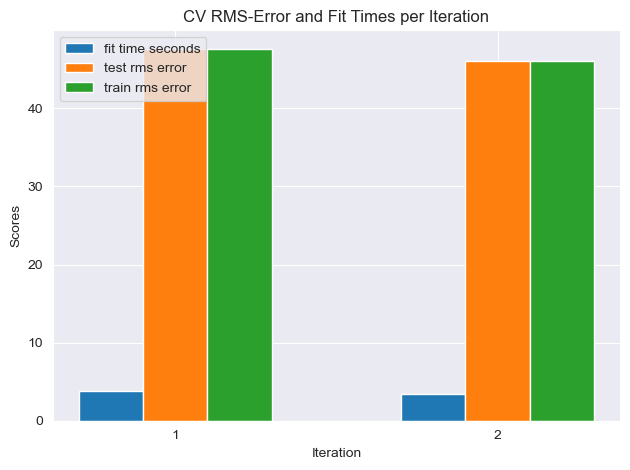

In [141]:
res_list = []
results = cross_validate(estimator=rfr, X=X_train_notam_red, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)
res_list.append((1,results))
print(f"Results for notam_changed data: "
      f"\n\tTrain Neg-RMS Error: {np.abs(np.mean(results.get('train_score'))):.4f}"
      f"\n\tTest Neg-RMS Error: {np.abs(np.mean(results.get('test_score'))):.4f}")
results = cross_validate(estimator=rfr, X=X_train_red, y=y_train, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, return_train_score=True)
res_list.append((2,results))
print(f"Results for previous data: "
      f"\n\tTrain Neg-RMS Error: {np.abs(np.mean(results.get('train_score'))):.4f}"
      f"\n\tTest Neg-RMS Error: {np.abs(np.mean(results.get('test_score'))):.4f}")

print_cv_results(res_list)

In [153]:
X_train = X_train_notam_red.copy()
X_train = X_train.drop(["DISTANCE(KM)"], axis="columns", errors="ignore")
X_test = transform_notam_cols(X_test)
X_test = X_test[X_train.columns]
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_train table: ")
X_train

Notam calls not detected in DataFrame. Returning same DataFrame
X_train shape:  (263204, 31)
y_train shape:  (263204,)
X_test shape:  (65801, 31)
y_test shape:  (65801,)
X_train table: 


,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC)
5998106,107,89,74,-0.433884,-0.900969,-0.985556,0.169350,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0,0,0,0.4
9744846,-3,106,83,0.433884,-0.900969,0.496217,-0.868199,255.576,9.000744,1525.176514,...,0,2,0,0,0,0,0,0,0,0.8
8656393,64,98,53,-0.781831,0.623490,-0.548293,-0.836286,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,3,0,2,0.4
7404998,-2,121,88,-0.433884,-0.900969,-0.719340,0.694658,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0,0,0,0.8
8855927,15,132,74,0.433884,-0.900969,-0.845728,0.533615,257.428,9.043416,1075.157934,...,0,0,0,0,0,0,0,2,0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-3,126,95,-0.781831,0.623490,0.678801,-0.734323,229.648,9.854184,823.857302,...,0,0,0,0,0,0,0,0,0,0.2
7551519,-8,142,74,0.000000,1.000000,-0.649448,-0.760406,257.428,9.043416,1075.157934,...,0,0,0,0,0,0,0,0,0,0.2
7375452,-4,122,58,0.433884,-0.900969,-0.999914,-0.013090,264.836,13.639800,2071.070234,...,0,0,0,0,0,2,2,2,2,0.2
7757994,180,92,62,-0.781831,0.623490,-0.608761,0.793353,259.280,6.324600,560.293571,...,0,0,0,0,0,0,0,0,0,1.0


In [154]:
from main.utils.data_manage_utils import save_processed_data_to_folder

filepath = os.path.join(OUTPUT_FOLDER, "CREG")

if not os.path.exists(filepath):
    os.makedirs(filepath)

save_processed_data_to_folder(filepath, X_train, y_train, X_test, y_test)